In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.


(20640, 8)
(20640,)


In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_valid)
x_test_scaled = scaler.fit_transform(x_test)

$$W=W+\nabla f\cdot learningRate$$

In [13]:
# W = W + grad * learning_rate
learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
# 保存所有的 history
histories = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    optimizer = keras.optimizers.SGD(lr)

    model.compile(loss="mean_squared_error", optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

In [14]:
history = model.fit(x_train_scaled, y_train, validation_data=(x_valid_scaled, y_valid), epochs=100, callbacks=callbacks)
histories.append(history)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.7032 - val_loss: 8.6619
Epoch 2/100
11610/11610 [==============================] - 0s 32us/sample - loss: nan - val_loss: nan
Epoch 3/100
11610/11610 [==============================] - 0s 33us/sample - loss: nan - val_loss: nan
Epoch 4/100
11610/11610 [==============================] - 0s 32us/sample - loss: nan - val_loss: nan
Epoch 5/100
11610/11610 [==============================] - 0s 33us/sample - loss: nan - val_loss: nan
Epoch 6/100
11610/11610 [==============================] - 0s 32us/sample - loss: nan - val_loss: nan


learning rate:  1e-06


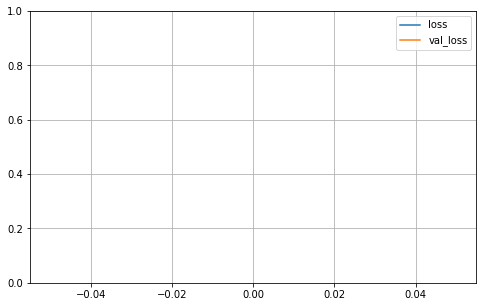

In [15]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
for lr, history in zip(learning_rates, histories):
    print("learning rate: ", lr)
    plot_learning_curves(history)

In [ ]:
model.evaluate(x_test_scaled, y_test)